In [87]:
from metricsGAN import get_midi_pattern, get_all_stats
import os
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
from music21 import corpus, converter
from IPython.display import Image, Audio
def play(music):
  filename = music.write('mid')
  !fluidsynth -ni font.sf2 $filename -F $filename\.wav -r 16000 > /dev/null
  display(Audio(str(filename) + '.wav'))

In [93]:
get_all_stats(get_midi_pattern('output/RNN-50i.mid'))

{'num_tones': 50,
 'tone_min': 38,
 'freq_min': 73.41619197935188,
 'tone_max': 62,
 'freq_max': 293.6647679174076,
 'tone_span': 24,
 'freq_span': 220.2485759380557,
 'tones_unique': 15,
 'repetitions_2': 33,
 'repetitions_3': 10,
 'repetitions_4': 3,
 'repetitions_5': 0,
 'repetitions_6': 0,
 'repetitions_7': 0,
 'repetitions_8': 0,
 'repetitions_9': 0,
 'scale': 'C major',
 'scale_score': 0.92,
 'estimated_beat': 1024,
 'estimated_beat_avg_ticks_off': 0.0,
 'intensity_min': 90,
 'intensity_max': 90,
 'intensity_span': 0,
 'polyphony_score': 0.0,
 'top_10_intervals': [(256, 0.98), (0, 0.02)],
 'top_2_interval_difference': 256,
 'top_3_interval_difference': 0.0}

In [45]:
route = 'run/compose/0017_chorales/samples/'
patterns = [get_midi_pattern(f'{route}{file}') for file in os.listdir(route)]

In [47]:
stats = [get_all_stats(pattern) for pattern in patterns]

In [48]:
stats[0]

{'num_tones': 106,
 'tone_min': 47,
 'freq_min': 123.47082531403103,
 'tone_max': 73,
 'freq_max': 554.3652619537442,
 'tone_span': 26,
 'freq_span': 430.89443663971315,
 'tones_unique': 22,
 'repetitions_2': 52,
 'repetitions_3': 12,
 'repetitions_4': 4,
 'repetitions_5': 3,
 'repetitions_6': 2,
 'repetitions_7': 1,
 'repetitions_8': 0,
 'repetitions_9': 0,
 'scale': 'C major',
 'scale_score': 0.7547169811320755,
 'estimated_beat': 1024,
 'estimated_beat_avg_ticks_off': 0.0,
 'intensity_min': 90,
 'intensity_max': 90,
 'intensity_span': 0,
 'polyphony_score': 0.7664233576642335,
 'top_10_intervals': [(0, 0.7075471698113207), (256, 0.29245283018867924)],
 'top_2_interval_difference': 256,
 'top_3_interval_difference': 0.0}

In [91]:
dict_df = {}
for j in stats:
    dict_df['Scale consistency, %'] = dict_df.get('Scale consistency, %',[]) + [j['scale_score']]
    dict_df['Tone span, halftones'] = dict_df.get('Tone span, halftones',[]) + [j['tone_span']]
    dict_df['Unique tones'] = dict_df.get('Unique tones',[]) + [j['tones_unique']]
    dict_df['Intensity span, units'] = dict_df.get('Intensity span, units',[]) + [j['intensity_span']]
    dict_df['Polyphony, %'] = dict_df.get('Polyphony, %',[]) + [j['polyphony_score']]
    dict_df['3-tone repetitions'] = dict_df.get('3-tone repetitions',[]) + [j['repetitions_3']]
data = pd.DataFrame(dict_df)

<AxesSubplot:>

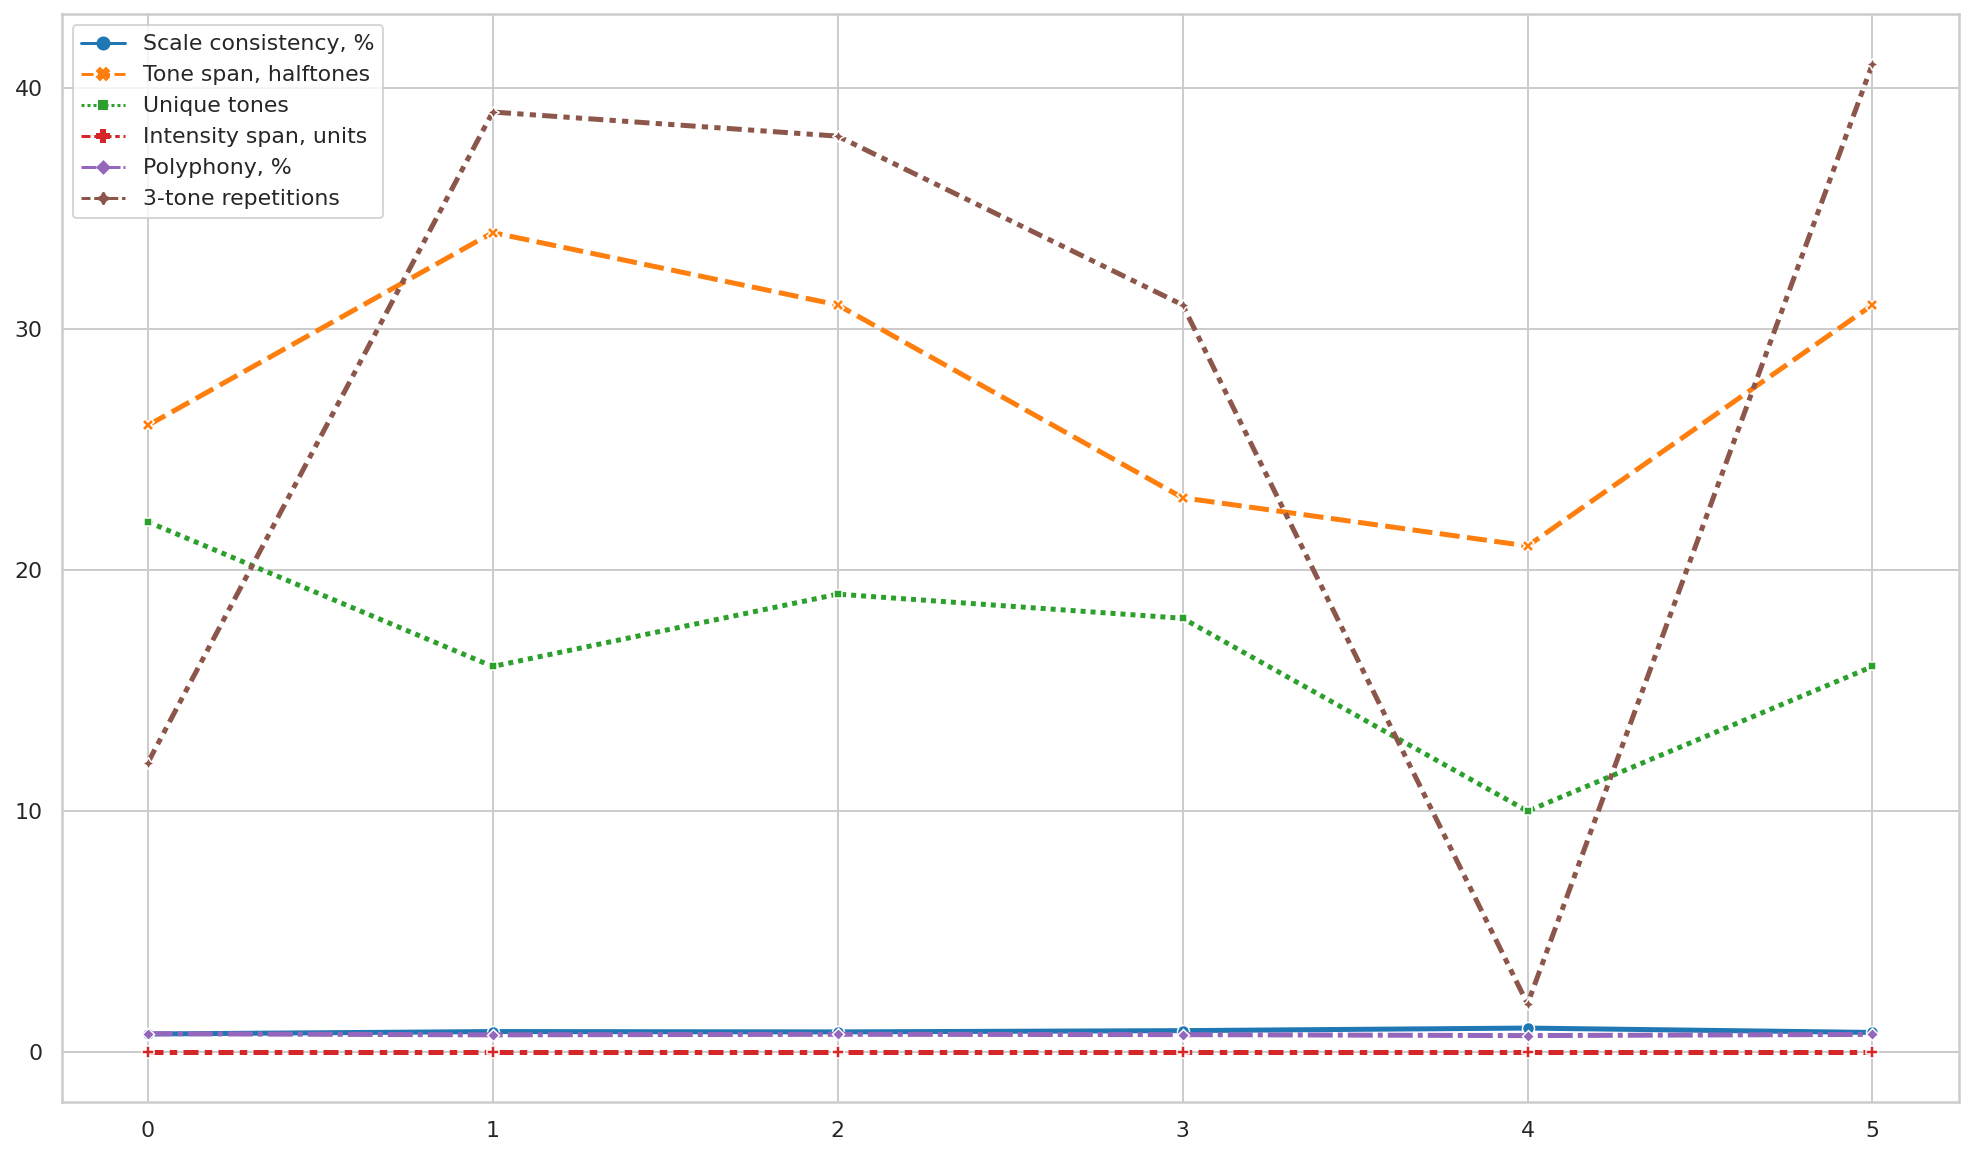

In [92]:
plt.figure(figsize=(17,10))
sns.set_theme(style="whitegrid")
sns.lineplot(data=data, palette="tab10", markers = True, linewidth=2.5)

In [84]:
dict_df = {}
for j in stats:
    dict_df['Polyphony, %'] = dict_df.get('Polyphony, %',[]) + [j['polyphony_score']]
data = pd.DataFrame(dict_df)

<AxesSubplot:>

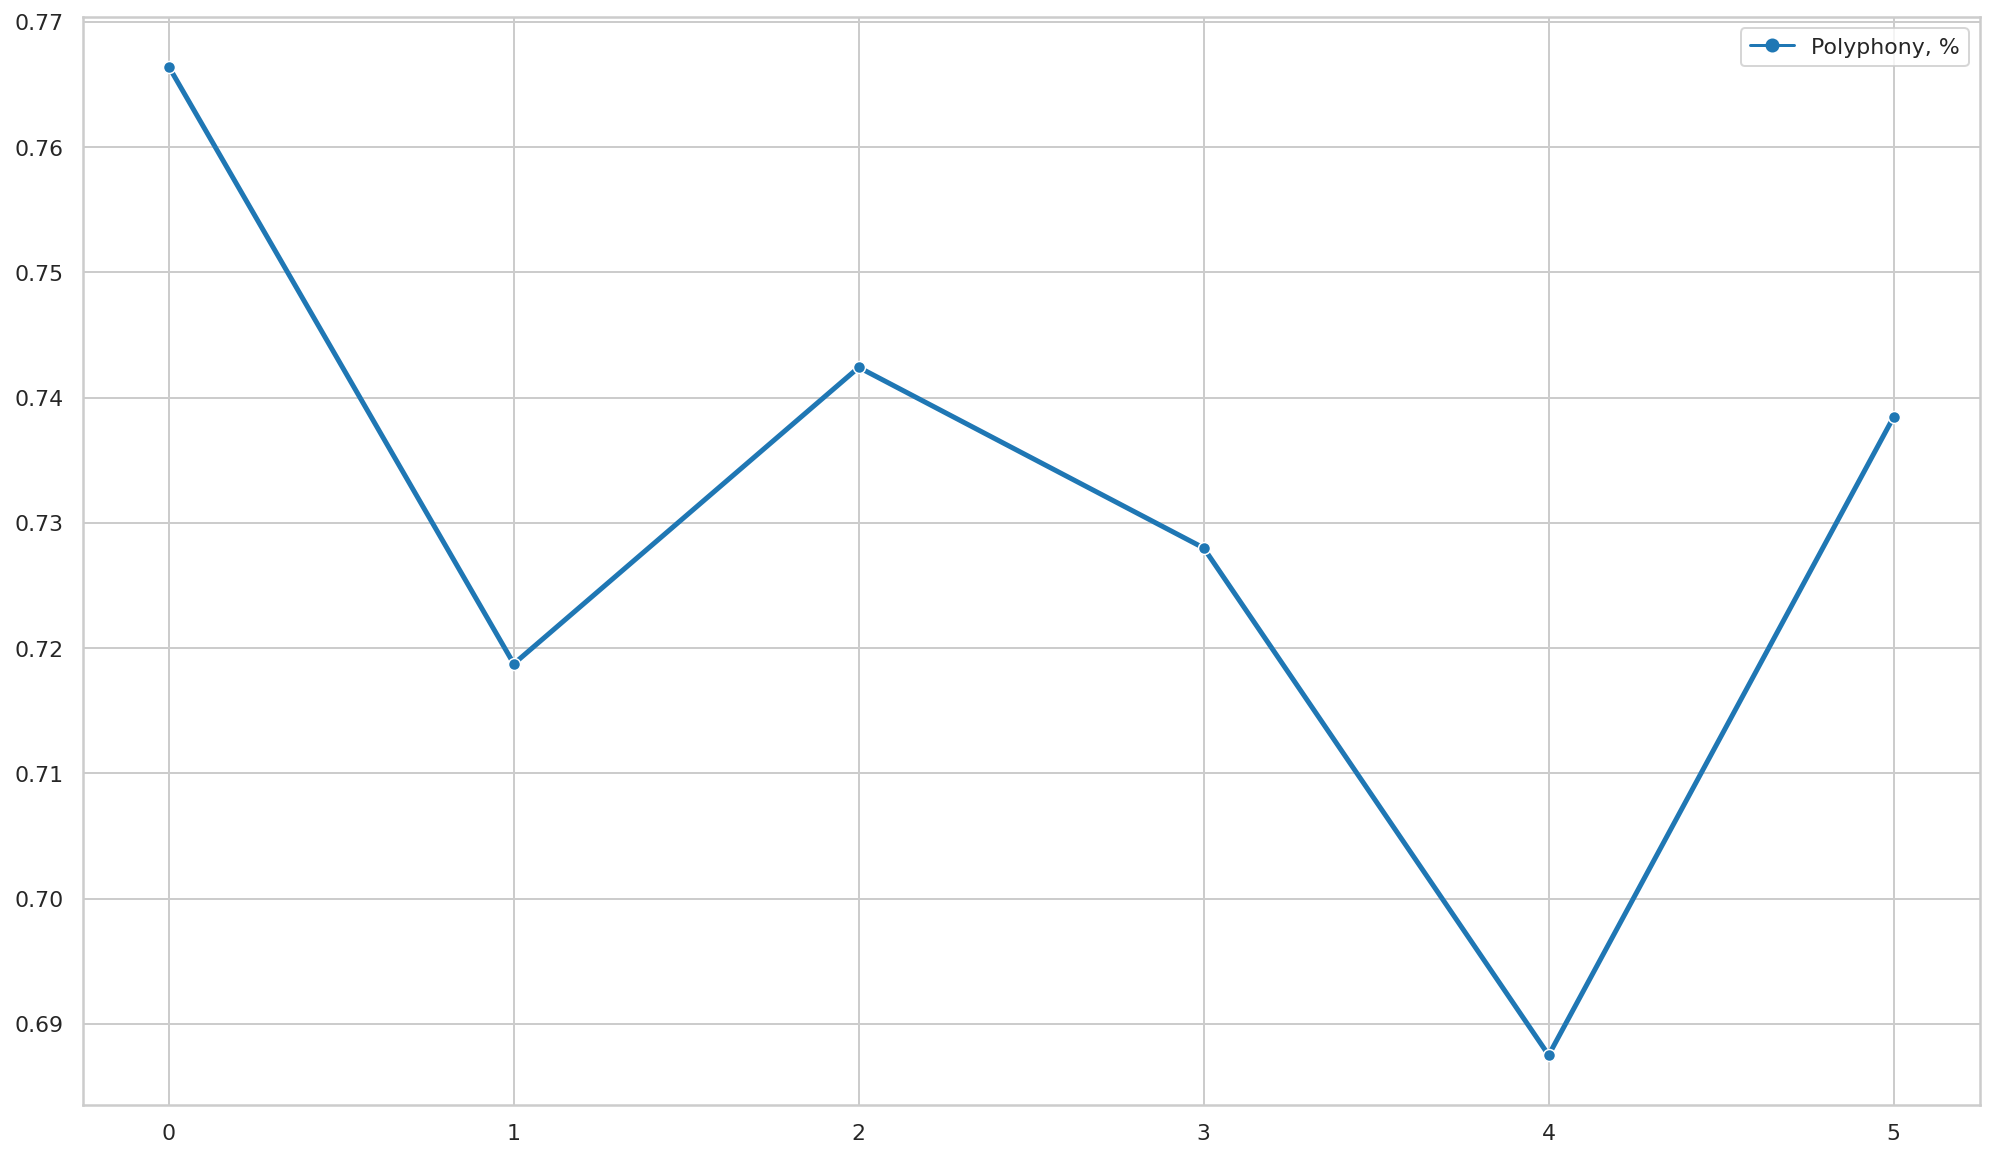

In [90]:
plt.figure(figsize=(17,10))
sns.set_theme(style="whitegrid")
sns.lineplot(data=data, palette="tab10", markers = True, linewidth=2.5)

In [80]:
#play(converter.parse("run/compose/0017_chorales/samples/changing_melody.midi").chordify())

In [81]:
#play(converter.parse("run/compose/0017_chorales/samples/changing_chords.midi").chordify())